### WEBSCRAPING USING PYTHON

#### 1.Data Extraction from Web using Python's Beautiful Soup Module

#### 2.Data Manipulation and cleaning using python's Pandas Library

#### 3.Data Visualization using Python's Matplotlib Library

**The dataset used in this tutorial was taken from a 10K race that took place in Hillsboro, OR on June 2017**

**We will analyze the performance of the 10K runners and answer questions such as:**

**• What was the average finish time for the runners?**

**• Did the runners' finish times follow a normal distribution?**

**• Were there any performance differences between males and females of various age groups?**

**Import the Libraries**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**URLLIB.Request module opens URLS.**
**The Beautiful Soup Extracts the data from html files**

In [90]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


**STEP1: urlopen() gets the html page that contains the URL data**

In [91]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

**Beautiful Soup package is used to parse the html, it take the raw html text and break it into python Objects. The second argument 'lxml' is the html parser**

In [92]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [93]:
#Get the Title of the page
title=soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [94]:
# Print out the Text
text=soup.get_text()
print(text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results





        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }

        #individualResults tbody tr {
            cursor: pointer;
        }

        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }

            .video-container iframe {
                position: absolute;
                top: 0;
                left: 0;
                width: 100%;
                height: 100%;
            }

        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }

            .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inlin

**find_all method is used to find useful tags a, table, tr, td, th**

In [95]:
# To find useful html tags within a webpage.
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px">Summary</a>,
 <a class="btn btn-secondary btn-sm" href="#team" role="button"><i aria-hidden="true" class="fa fa-users"></i> Team Results</a>,
 <a class="btn btn-secondary btn-sm" href="#individual" role="button"><i aria-hidden="true" class="fa fa-user"></i> Individual Results</a>,
 <a name="team"></a>,
 <a id="individual" name="individual"></a>,
 <a href="#tabs-1" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-

In [96]:
getLinks = soup.find_all("a")
for link in getLinks:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/summary/2017GPTR10K
#team
#individual
None
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


**To print out the tables rows**

In [97]:
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr>
<td>Award</td>
<td>Name</td>
<td>Combined Time</td>
<td>1</td><td>2</td><td>3</td><td>4</td></tr>, <tr><td>1ST</td>
<td>DTNA2</td>
<td>02:54:41</td>
<td>00:40:36 - ANDY WEDAM</td><td>00:44:05 - VASILIOS TSIRIMIAGOS</td><td>00:44:48 - ANDRE RAUCH</td><td>00:45:10 - JONATHAN PARSONS</td></tr>, <tr><td>2ND</td>
<td>INTEL TEAM K</td>
<td>03:01:02</td>
<td>00:41:43 - WILLIAM BARRY</td><td>00:42:36 - EDDIE J FRIE</td><td>00:43:46 - SAMANTHA BAGLEY</td><td>00:52:55 - JOHN HAMILTON</td></tr>, <tr><td>3RD</td>
<td>INTEL TEAM F</td>
<td>03:06:06</td>
<td>00:36:42 - NATHAN A SUSTERSIC</td><td>00:39:21 - DEREK G OSBORNE</td><td>00:52:47 - CODY L COVEY</td><td>00:57:16 - VIRAJ P MODAK</td></tr>, <tr><td>4TH</td>
<td>DTNA1</td>
<td>03:15:33</td>
<td>00:40:28 - WITALI SPULING</td><td>00:46:45 - INGA ANDREYEVA</td><td>00:54:09 - KEATON WEISENBORN

**GOAL: to get tables from webpage and convert it into the dataframe. First all table rows into list form and then convert it into the dataframe**

In [98]:
for row in rows:
    row_td=row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>LIBBY B MITCHELL</td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>163 of 163</td>, <td>F 36-45</td>, <td>56 of 56</td>, <td>0:52</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

**Remove the html tags of above list. There are two ways get_text() of beautiful Soup or regular Expression**

In [99]:
str_cells = str(row_td)
clean_text=BeautifulSoup(str_cells,"lxml").get_text()
print(clean_text)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


In [100]:
import re

list_rows=[]
for row in rows:
    cells=row.find_all('td')
    str_cells=str(cells)
    clean=re.compile('<.*?>')
    clean2=(re.sub(clean,'',str_cells))
    list_rows.append(clean2)
    print(clean2)
    type(clean2)


[]
[Finishers:, 577]
[Male:, 414]
[Female:, 163]
[Award, Name, Combined Time, 1, 2, 3, 4]
[1ST, DTNA2, 02:54:41, 00:40:36 - ANDY WEDAM, 00:44:05 - VASILIOS TSIRIMIAGOS, 00:44:48 - ANDRE RAUCH, 00:45:10 - JONATHAN PARSONS]
[2ND, INTEL TEAM K, 03:01:02, 00:41:43 - WILLIAM BARRY, 00:42:36 - EDDIE J FRIE, 00:43:46 - SAMANTHA BAGLEY, 00:52:55 - JOHN HAMILTON]
[3RD, INTEL TEAM F, 03:06:06, 00:36:42 - NATHAN A SUSTERSIC, 00:39:21 - DEREK G OSBORNE, 00:52:47 - CODY L COVEY, 00:57:16 - VIRAJ P MODAK]
[4TH, DTNA1, 03:15:33, 00:40:28 - WITALI SPULING, 00:46:45 - INGA ANDREYEVA, 00:54:09 - KEATON WEISENBORN, 00:54:10 - MAISIE WEISENBORN]
[5TH, FXG1, 03:21:16, 00:42:56 - DAVID HERRON, 00:46:35 - LEO SOTO, 00:53:59 - TONY GONZALEZ, 00:57:45 - ARINDA SCHRUM]
[6TH, INTEL TEAM B, 03:26:38, 00:46:26 - EDMONDO MAZZULLI, 00:48:44 - JUN TAKEI, 00:53:49 - NIKHIL TALPALLIKAR, 00:57:38 - PRANAV NAKATE]
[7TH, COLUMBIA TEAM B, 03:38:34, 00:40:17 - BRANDON THOMAS, 00:47:05 - RANIER EVANS, 01:04:19 - KENDRA DONLI

[145, 620, SANGHYUN SEO, M, PORTLAND, OR, 51:00, 8:13, 128 of 414, M 36-45, 49 of 152, 0:41, 51:41, ]
[146, 738, CORY E WEBER, M, HILLSBORO, OR, 51:02, 8:14, 129 of 414, M 36-45, 50 of 152, 0:23, 51:25, ]
[147, 372, SRINIDHI N KAUSHIK, M, BEAVERTON, OR, 51:05, 8:14, 130 of 414, M 26-35, 41 of 154, 0:17, 51:22, ]
[148, 685, ERIC CHEN, M, PORTLAND, OR, 51:06, 8:14, 131 of 414, M 46-55, 24 of 64, 1:00, 52:06, ]
[149, 383, KEALOHA OYER, M, HILLSBORO, OR, 51:08, 8:14, 132 of 414, M 36-45, 51 of 152, 0:10, 51:18, ]
[150, 563, CAMERON R WAGNER, M, BEAVERTON, OR, 51:08, 8:14, 133 of 414, M 36-45, 52 of 152, 0:07, 51:15, ]
[151, 261, JUSTON LI, M, OTHER, OR, 51:10, 8:15, 134 of 414, M 18-25, 16 of 34, 0:34, 51:44, 
                                               INTEL TEAM D
                                          ]
[152, 161, JAIMIEY I SEARS, M, HILLSBORO, OR, 51:12, 8:15, 135 of 414, M 18-25, 17 of 34, 0:16, 51:28, ]
[153, 799, MANOJ ATHAWALE, M, HILLSBORO, OR, 51:18, 8:16, 136 of 414, M 36-

[545, 557, ADITHYA CHETTY, M, BEAVERTON, OR, 1:23:09, 13:24, 401 of 414, M Under 18, 2 of 2, 1:04, 1:24:13, ]
[546, 839, GEORGE E MATTHEW, M, ALOHA, OR, 1:23:10, 13:24, 402 of 414, M 26-35, 150 of 154, 0:11, 1:23:21, 
                                               INTEL TEAM G
                                          ]
[547, 695, APURVA LONKAR, F, HILLSBORO, OR, 1:23:12, 13:25, 145 of 163, F 36-45, 49 of 56, 0:12, 1:23:24, ]
[548, 539, JESS NICOLLS, F, HILLSBORO, OR, 1:23:30, 13:28, 146 of 163, F 26-35, 53 of 59, 0:40, 1:24:10, ]
[549, 58, RAMA CHAKRI, M, HILLSBORO, OR, 1:23:30, 13:28, 403 of 414, M 26-35, 151 of 154, 0:10, 1:23:40, ]
[550, 353, RAJYALAKSHMI BOMMARAJU, F, PORTLAND, OR, 1:23:45, 13:30, 147 of 163, F 36-45, 50 of 56, 0:37, 1:24:22, ]
[551, 672, SANDEEP K DEY, M, HILLSBORO, OR, 1:23:54, 13:31, 404 of 414, M 36-45, 147 of 152, 0:57, 1:24:51, ]
[552, 216, LAKSHMI BHUPALAM, F, PORTLAND, OR, 1:24:09, 13:34, 148 of 163, F 36-45, 51 of 56, 0:45, 1:24:54, ]
[553, 634, PAVAN KUM

**Step is to convert the list into the Dataframe**

In [101]:
df=pd.DataFrame(list_rows)
df.head()

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,"[Award, Name, Combined Time, 1, 2, 3, 4]"


### Data Manupulation and Cleaning

In [102]:
df1 = df[0].str.split(',',expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,[1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,[2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,[3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,[4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,[5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


In [103]:
df1[0]=df1[0].str.strip('[')
df1[0]=df1[0].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


In [104]:
col_labels=soup.find_all('th')
print(col_labels)

[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>City</th>, <th>State</th>, <th>Chip Time</th>, <th>Chip Pace</th>, <th>Gender Place</th>, <th>Age Group</th>, <th>Age Group Place</th>, <th>Time to Start</th>, <th>Gun Time</th>, <th>Team</th>]


In [105]:
str_th=str(col_labels)
clean_th=BeautifulSoup(str_th,'lxml').get_text()
print(clean_th)

[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]


In [106]:
list_header=[]
col_str=str(col_labels)
cleantext2=BeautifulSoup(col_str,'lxml').get_text()
list_header.append(cleantext2)
print(list_header)


['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [107]:
df2=pd.DataFrame(list_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [108]:
df3=df2[0].str.split(',',expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


**Concate the two data frames header and the rows of the table**

In [109]:
frames=[df3,df1]

df4=pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None


In [110]:
df5=df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None


In [111]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
[Place              598 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.1+ KB


**Drop missing values in the tables**

In [112]:
df6 = df5.dropna(axis=0, how='any')


In [113]:
df7=df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


In [114]:
df7.rename(columns={'[Place':'Place'},inplace=True)
df7.rename(columns={' Team]':'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


In [115]:
df7['Team']=df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


**DATA ANALYSIS and DATA VISUALIZATION**

**what was the average finish time (in minutes) for the runners?**

In [122]:
import time
time_list = df7[' Chip Time'].tolist()
#print(time_list)

time_mins = []
for i in time_list: 
    x = i.split(':')
    math=0
    h=0
    m=0
    s=0
    if len(x) == 3:
        h = 60*int(x[0])
        m = int(x[1])
        s = int(x[2])/60
    else:
        h = 60*int(x[0])
        m = int(x[1])
    
    math = h+m+s
    time_mins.append(math)

In [123]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,2181.0
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...,2202.0
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,2264.0
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,2314.0
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...,2361.0


In [124]:
df7.describe(include=[np.number])


,Runner_mins
count,577.000000
mean,1659.333016
std,1515.585173
min,60.016667
25%,68.300000
50%,2543.000000
75%,3109.000000
max,3595.000000


In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x20be28d8780>],
 <a list of 1 Text xticklabel objects>)

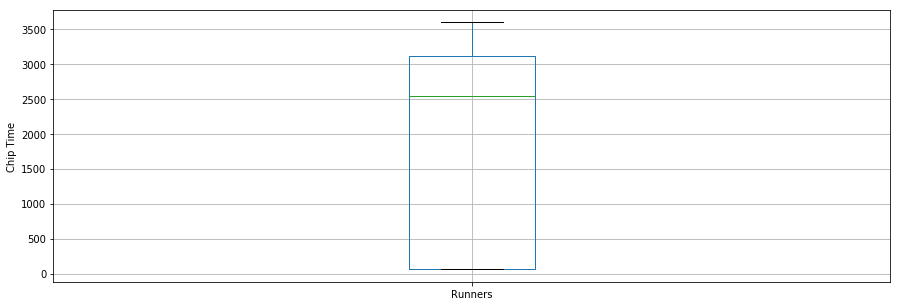

In [126]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

**Did the runners' finish times follow a normal distribution?**

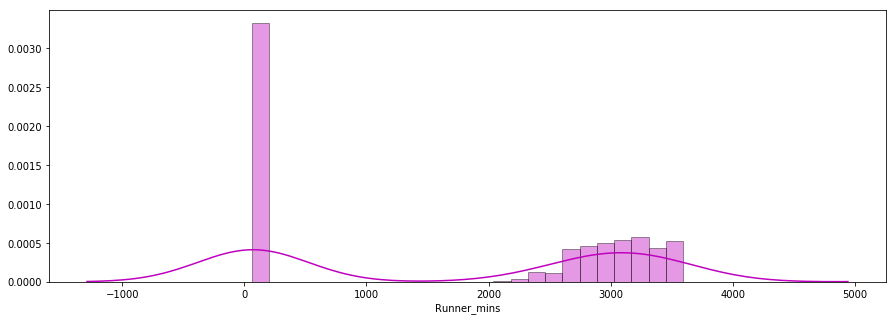

In [127]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

**whether there were any performance differences between males and females of various age groups**

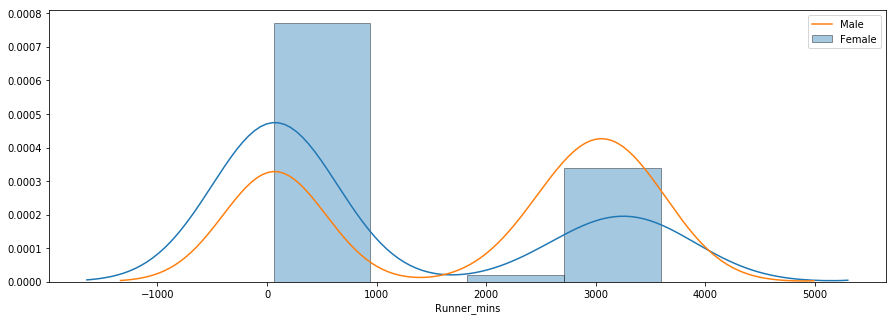

In [128]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [129]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                  \
              count         mean          std        min        25%   
 Gender                                                               
 F            163.0  1078.874131  1485.525309  60.200000  66.550000   
 M            414.0  1887.871176  1467.178242  60.016667  69.320833   

                                       
                 50%      75%     max  
 Gender                                
 F         75.216667  2888.00  3595.0  
 M       2722.000000  3145.75  3593.0  


Text(0.5, 0.98, '')

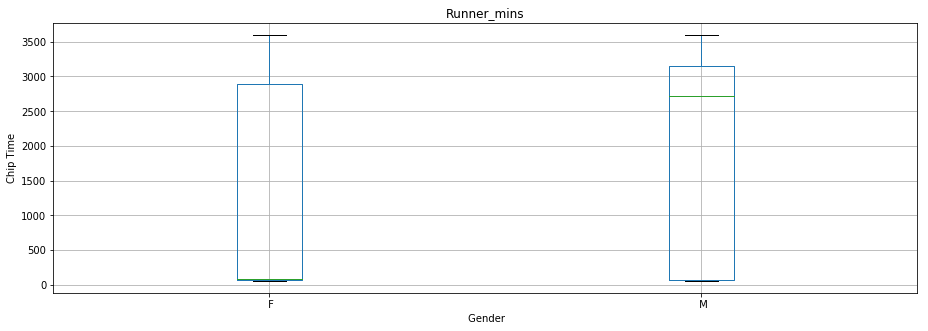

In [130]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")